In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
image_path = 'frames/frame_3431.jpg' # <-- Path to image
image = Image.open(image_path)
pixel_array = np.array(image)


In [ ]:
height, width, channels = pixel_array.shape

In [ ]:
step = 3 # <-- This is sampling step value
space = 0 # <-- This is space between bars value
width = width // step

In [ ]:
sost = []
for i in range(width):
    if pixel_array[0, i * step][0] > 100:
        sost.append('black')
    else:
        sost.append('white')

In [ ]:
data = [[], []]

In [ ]:
for i in range(0, width, step):

    h = 1

    for j in range(height - 1, -1, -1):

        new_sost = 'white'
        
        if pixel_array[j, i * step][0] > 100:
            new_sost = 'black'

        if sost[i] != new_sost:

            delta = 0

            if new_sost == 'white':
                delta = 1

            sost[i] = new_sost

            try:
                data[2*h+delta].append(i * step)

            except:
                for _ in range(2):
                    data.append([])

                data[2*h+delta].append(i * step)

            h += 1
    
        else:

            delta = 0

            if new_sost == 'white':
                delta = 1

            data[2*(h-1)+delta].append(i * step)

In [ ]:
my_bins = [i * step for i in range(width + 1)]

In [ ]:
colors = ['white', 'black'] * (len(data) // 2)

In [ ]:
is_colored = False # <-- Display in color?

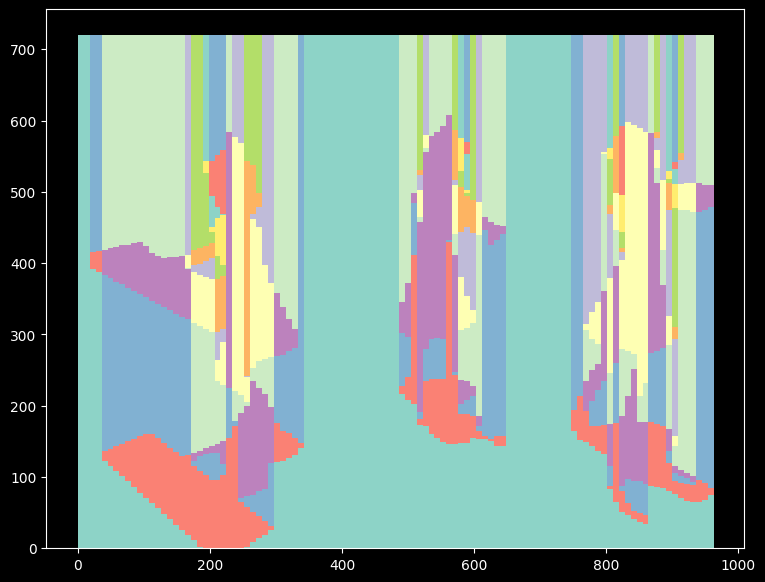

In [ ]:
plt.figure(figsize=(9, 7)) # image size

if is_colored:
    plt.hist(data, bins=my_bins, stacked=True, width=step**2 - space)
else:
    plt.hist(data, bins=my_bins, stacked=True, width=step**2 - space, color=colors)

plt.savefig('outp.jpeg', dpi=300) # saving image

plt.show()